C:\Users\User\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:287: ComplexWarning: Casting complex values to real discards the imaginary part
  r = _zeros._bisect(f,a,b,xtol,rtol,maxiter,args,full_output,disp)


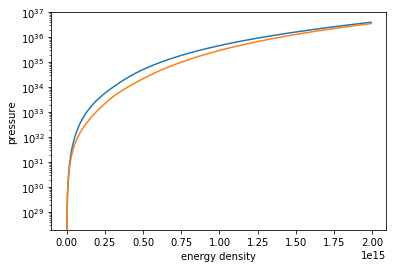

In [6]:
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

s_a = -130.4
s_b = 537
s_r = 2.39
n_a = 31.0
n_b = 780.2
n_r = 2.77
MxC = 50


MmuC = 105.6
pi = 3.14
c = 2.99792458
hc = 197.33

listnb = []
listxp = []
listepsilon = []
listE = []
listP = []
listdelta = []



listen_s=[]
listen_n=[]
listEsym=[]

nb = 0
while nb < 1.2:
    def F(xp):
        en_s = s_a*nb + s_b*nb**s_r
        en_n = n_a*nb + n_b*nb**n_r
        Esym = en_n - en_s
        Ha = 4*Esym*(1-2*xp)
        Sol = (3*pi**2*hc**3*nb*xp)  - Ha**3 \
        - ( np.heaviside(Ha-MmuC ,0) * ((Ha**2-MmuC**2)**(3/2)) )  
        return Sol
    xp = scipy.optimize.bisect(F,0,2)
    
    en_s = s_a*nb + s_b*nb**s_r
    en_n = n_a*nb + n_b*nb**n_r
    Esym =  en_n - en_s 
    
    delta = 1 - 2*xp
    E = en_n + Esym*delta**2
    P = (nb**2)* (s_a + s_r* s_b*nb**(s_r-1) + \
    ( n_a + n_r * n_b*nb**(n_r-1) - s_a - s_r* s_b*nb**(s_r-1))**(delta**2)) \
    + (4/3) * hc * xp * (3*pi**2*nb*xp)**(1/3)
    
            
    
    listen_s.append(en_s)
    listen_n.append(en_n)
    listEsym.append(Esym)
    
    listdelta.append(delta)
    listP.append(P)
    listE.append(E)
    listnb.append(nb)
    listxp.append(xp)
    nb = nb + 0.001


listP = [i * 1.6022e33 for i in listP] 
listrho = [i *(1.7827e12)* 931.494 for i in listnb] 


from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

G = 6.67428e-8
c = 2.997924562e10


rho = listrho
P = listP

eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

plt.xlabel("energy density")
plt.ylabel("pressure")
plt.plot(listrho,listP)

'''
pi = 3.14
G = 6.674e-8
c = 3e10
Gamma = 5/3
K = 1e13
Gamma1 = 4/3
K1 = 1.2e15

PD = [i *K**Gamma for i in listrho] 
PDD = [i *K1**Gamma1 for i in listrho]
    
#plt.plot(listrho,PD)
#plt.plot(listrho,PDD)

m = 9.109e-28
c = 3e10
pi = 3.14

e0 = 1.42e24
def e(x) :
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x))
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -            np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-19,-13.4,1000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

plt.plot(rho,eos(rho))
plt.xlabel("energy density")
plt.ylabel("pressure")
plt.yscale("log")
'''
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

s_a = -130.4
s_b = 537
s_r = 2.39
n_a = 31.0
n_b = 780.2
n_r = 2.77
MxC = 50


MmuC = 105.6
pi = 3.14
c = 2.99792458
hc = 197.33

listnb = []
listxp = []
listepsilon = []
listE = []
listP = []
listdelta = []



listen_s=[]
listen_n=[]
listEsym=[]


nb = 0
while nb < 1.2:
    def F(xp):
        en_s = s_a*nb + s_b*nb**s_r
        en_n = n_a*nb + n_b*nb**n_r
        Esym = en_n - en_s
        Ha = 4*Esym*(1-2*xp)
        Sol = (3*pi**2*hc**3*nb*xp)  - Ha**3 \
        - ( np.heaviside(Ha-MmuC ,0) * ((Ha**2-MmuC**2)**(3/2)) )  
        return Sol
    xp = scipy.optimize.bisect(F,0,2)
    
    en_s = s_a*nb + s_b*nb**s_r
    en_n = n_a*nb + n_b*nb**n_r
    Esym =  en_n - en_s 
    
    delta = 1 - 2*xp
    E = en_n + Esym*delta**2
    P = (nb**2)* (s_a + s_r* s_b*nb**(s_r-1) + \
    ( n_a + n_r * n_b*nb**(n_r-1) - s_a - s_r* s_b*nb**(s_r-1))**(delta**2)) \
    
            
    
    listen_s.append(en_s)
    listen_n.append(en_n)
    listEsym.append(Esym)
    
    listdelta.append(delta)
    listP.append(P)
    listE.append(E)
    listnb.append(nb)
    listxp.append(xp)
    nb = nb + 0.001


listP = [i * 1.6022e33 for i in listP] 
listrho = [i *(1.7827e12)* 931.494 for i in listnb] 


from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

G = 6.67428e-8
c = 2.997924562e10


rho = listrho
P = listP

eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

plt.xlabel("energy density")
plt.ylabel("pressure")
plt.plot(listrho,listP)
plt.xlabel("energy density")
plt.ylabel("pressure")
plt.yscale("log")

0.1
0.15000000000000002
0.20000000000000004
0.25000000000000006
0.30000000000000004
0.3500000000000001
0.40000000000000013
0.45000000000000007
0.5000000000000001
0.5500000000000002
0.6000000000000002
0.6500000000000001
0.7000000000000002
0.7500000000000002
0.8000000000000002
0.8500000000000002
0.9000000000000002
0.9500000000000003


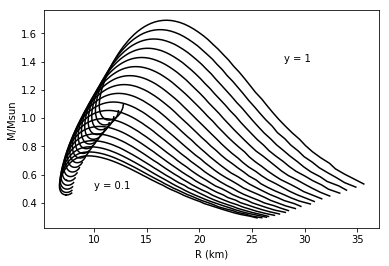

In [15]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
from scipy.interpolate import interp1d
from scipy.integrate import odeint

m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

j = 0
y = np.arange(0.1,1,0.05)
for j in range(len(y)):
    def e(x) :
        return (e0/8) *  (    (  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x))  +  ((1/3*pi**2)**2) * (y[j]**2) *(x**6)   )   /c**2       
        #return ((e0/8) *  (    (  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)))  +  ((1/3*pi**2)**2) * (y[j]**2) *(x**6) )     /c**2                       
    def p(x):
        return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)  + ((1/3*pi**2)**2) * (y[j]**2) *(x**6)  )
        #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x) )  + ((1/3*pi**2)**2) * (y[j]**2) *(x**6)  
    k = np.logspace(-15,-13.4,10000)
    x = k/(m*c)

    rho = e(x)
    P = p(x)
    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(1,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol[:,1] 


  

#plot M_R curve
    r = np.arange(1,5000000,1)
    rhocD = np.logspace(14-0.4*y[j],18,100)#up18
    listrhocD = np.zeros_like(rhocD)
    M = np.zeros_like(rhocD)
    R = np.zeros_like(rhocD)
    location = np.zeros_like(rhocD)
    i = 0
    for i in range(len(rhocD)) :
        diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
        lo = np.where (diff < 1)[0]
        lo1 = lo[0]
        M[i] = TOVsolve(rhocD[i])[lo1]
        R[i] = r[lo1]
        i = i + 1
    
    
    
# max M and R
    M_max = max(M)
    location1 = np.where(M == M_max)
    R_max = R[location1]

   
    Msun = 1.98892e33
    #print("Max mass :",M_max/Msun)
    #print("Max mass radius :" ,R_max/100000)
    print(y[j])
    plt.plot(R/100000,M/Msun,color='k')
    j = j + 1
    
plt.text(10, 0.5, 'y = 0.1')
plt.text(28, 1.4, 'y = 1')
plt.xlabel('R (km)')
plt.ylabel('M/Msun')

plt.savefig('filename.png',dpi=300)


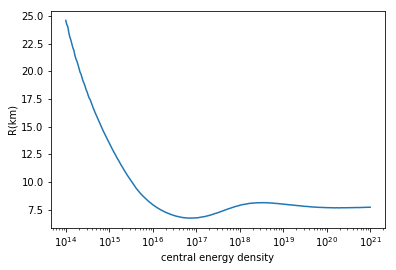

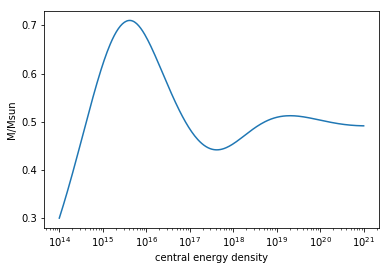

In [0]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d


m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

def e(x) :
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(1,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol[:,1] 
'''
r = np.arange(1,5000000,1)
rhoc = 5e15
plt.plot(r,TOVsolve(rhoc))
'''
#plot M_R curve
r = np.arange(1,5000000,1)
rhocD = np.logspace(14,21,300)#up22
listrhocD = np.zeros_like(rhocD) 
M = np.zeros_like(rhocD)
R = np.zeros_like(rhocD)
location = np.zeros_like(rhocD)
i = 0
for i in range(len(rhocD)) :
    diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
    lo = np.where (diff < 1)[0]
    lo1 = lo[0]
    M[i] = TOVsolve(rhocD[i])[lo1]
    R[i] = r[lo1]
    listrhocD[i] = rhocD[i]
    i = i + 1
    
# max M and R
M_max = max(M)
location1 = np.where(M == M_max)
R_max = R[location1]
'''
Msun = 1.98892e33
print("Max mass :",M_max/Msun)
print("Max mass radius :" ,R_max/100000)
plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(5,25)
'''
plt.plot(listrhocD,R/100000)
plt.xscale('log')
plt.ylabel('R(km)')
plt.xlabel("central energy density")
plt.show()
plt.plot(listrhocD,M/Msun)
plt.xscale('log')
plt.xlabel("central energy density")
plt.ylabel('M/Msun')
plt.show()


Max mass : 0.7099543883461695
Max mass radius : [9.42358]


(5, 25)

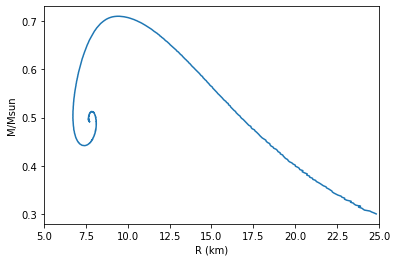

In [0]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d


m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

def e(x) :
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(1,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol[:,1] 
'''
r = np.arange(1,5000000,1)
rhoc = 5e15
plt.plot(r,TOVsolve(rhoc))
'''
#plot M_R curve
r = np.arange(1,5000000,1)
rhocD = np.logspace(14,21,1000)#up22
M = np.zeros_like(rhocD)
R = np.zeros_like(rhocD)
location = np.zeros_like(rhocD)
i = 0
for i in range(len(rhocD)) :
    diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
    lo = np.where (diff < 1)[0]
    lo1 = lo[0]
    M[i] = TOVsolve(rhocD[i])[lo1]
    R[i] = r[lo1]
    i = i + 1
    
# max M and R
M_max = max(M)
location1 = np.where(M == M_max)
R_max = R[location1]

Msun = 1.98892e33
print("Max mass :",M_max/Msun)
print("Max mass radius :" ,R_max/100000)
plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(5,25)


[0.01991462 0.01992196 0.0199293  ... 0.79223138 0.79252333 0.79281539]


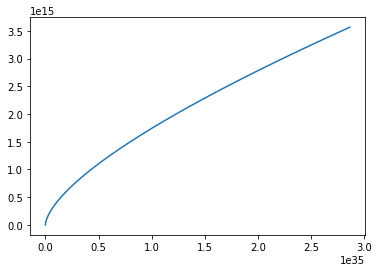

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d


m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

def e(x) :
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

plt.plot(P,rho)

print(x)

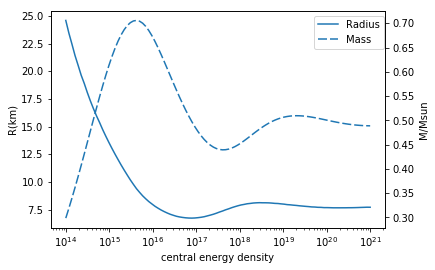

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d


m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

def e(x) :
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(1,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol[:,1] 
'''
r = np.arange(1,5000000,1)
rhoc = 5e15
plt.plot(r,TOVsolve(rhoc))
'''
#plot M_R curve
r = np.arange(1,5000000,1)
rhocD = np.logspace(14,21,100)#up22
listrhocD = np.zeros_like(rhocD) 
M = np.zeros_like(rhocD)
R = np.zeros_like(rhocD)
location = np.zeros_like(rhocD)
i = 0
for i in range(len(rhocD)) :
    diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
    lo = np.where (diff < 1)[0]
    lo1 = lo[0]
    M[i] = TOVsolve(rhocD[i])[lo1]
    R[i] = r[lo1]
    listrhocD[i] = rhocD[i]
    i = i + 1
    
# max M and R
M_max = max(M)
location1 = np.where(M == M_max)
R_max = R[location1]
'''
Msun = 1.98892e33
print("Max mass :",M_max/Msun)
print("Max mass radius :" ,R_max/100000)
plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(5,25)
'''
Msun = 2e33
fig, ax1 = plt.subplots()
ax1.plot(listrhocD,R/100000,label='Radius')
plt.xscale('log')
plt.ylabel('R(km)')
plt.xlabel("central energy density")
ax2 = ax1.twinx() 
ax2.plot(listrhocD,M/Msun,label='Mass',dashes=[6, 2])
plt.xscale('log')
plt.xlabel("central energy density")
plt.ylabel('M/Msun')

fig.legend(loc="upper right",bbox_to_anchor=(0.9, 0.9))


Max mass : 0.68952456186333
Max mass radius : [11.12935]


(0.4, 0.75)

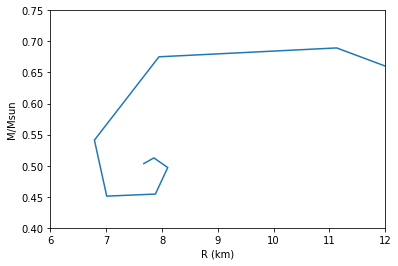

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import odeint

m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

def e(x) :
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(1,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol[:,1] 
'''
r = np.arange(1,5000000,1)
rhoc = 5e15
plt.plot(r,TOVsolve(rhoc))
'''
#plot M_R curve
r = np.arange(1,5000000,1)
rhocD = np.logspace(14,20,10)#up22
M = np.zeros_like(rhocD)
R = np.zeros_like(rhocD)
location = np.zeros_like(rhocD)
i = 0
for i in range(len(rhocD)) :
    diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
    lo = np.where (diff < 1)[0]
    lo1 = lo[0]
    M[i] = TOVsolve(rhocD[i])[lo1]
    R[i] = r[lo1]
    i = i + 1
    
# max M and R
M_max = max(M)
location1 = np.where(M == M_max)
R_max = R[location1]

Msun = 1.98892e33
print("Max mass :",M_max/Msun)
print("Max mass radius :" ,R_max/100000)
plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(6,12)
plt.ylim(0.4,0.75)


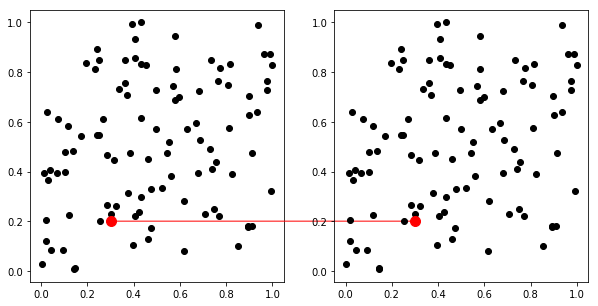

In [136]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x,y = np.random.rand(100),np.random.rand(100)

ax1.plot(x,y,'ko')
ax2.plot(x,y,'ko')


i = 10
xy = (x[i],y[i])
con = ConnectionPatch(xyA=xy, xyB=xy, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color="red")
ax2.add_artist(con)

ax1.plot(x[i],y[i],'ro',markersize=10)
ax2.plot(x[i],y[i],'ro',markersize=10)


plt.show()

(array([49], dtype=int64),)
(array([0], dtype=int64),)


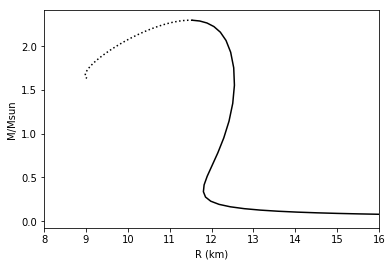

In [199]:
import numpy as np
from scipy.optimize import curve_fit
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff

a= 13.4
alpha = 0.514
b = 5.62
beta = 2.436
rho0 = 0.16
mn = 939

def E(rho):
    eos = a*(rho/rho0)**(alpha) + b*(rho/rho0)**beta
    return rho*(mn+eos)
def P(rho):
    return rho*(a*alpha*((rho/rho0)**alpha) + b*beta*((rho/rho0)**beta))

    
    
rho = np.arange(0.0001,0.5,0.00001)
listP = [i * 1.6022e33 for i in P(rho)] 
listrho = [i *1.7827e12 for i in E(rho)] 





from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
pi = 3.14
G = 6.67428e-8
c = 2.997924562e10

rho = listrho
P = listP

eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(10,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol#[:,1]

r = np.arange(10,5000000,1)


p = 50
#plot M_R curve
rhoc =np.logspace(12.8,15.3,p)
M = np.zeros_like(rhoc)
R = np.zeros_like(rhoc)
listrhoc = []
i = 0
for i in range(len(rhoc)) :
    P = TOVsolve(rhoc[i])[:,0]
    m = TOVsolve(rhoc[i])[:,1]
    location = np.where(P<1)[0][0]
    R[i] = r[location]
    M[i] = m[location]
    listrhoc.append(rhoc[i])
    i = i + 1

M_max = max(M)
location1 = np.where(M == M_max)
print(location1)

Msun = 2e33
plt.plot(R/100000,M/Msun,color='k')
#plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(8,16)



rhoc =np.logspace(15.3,16.8,p)
M = np.zeros_like(rhoc)
R = np.zeros_like(rhoc)
listrhoc = []
i = 0
for i in range(len(rhoc)) :
    P = TOVsolve(rhoc[i])[:,0]
    m = TOVsolve(rhoc[i])[:,1]
    location = np.where(P<1)[0][0]
    R[i] = r[location]
    M[i] = m[location]
    listrhoc.append(rhoc[i])
    i = i + 1

M_max = max(M)
location1 = np.where(M == M_max)
print(location1)

Msun = 2e33
plt.plot(R/100000,M/Msun,label='Uix',linestyle=':',color='k')
plt.savefig('filename.png',dpi=300)

In [195]:
print(listrhoc[35])
print(np.logspace(12.8,15.28))

1956705310696114.8
[6.30957344e+12 7.08944512e+12 7.96570997e+12 8.95028232e+12
 1.00565491e+13 1.12995520e+13 1.26961916e+13 1.42654578e+13
 1.60286874e+13 1.80098545e+13 2.02358965e+13 2.27370802e+13
 2.55474136e+13 2.87051079e+13 3.22530974e+13 3.62396232e+13
 4.07188889e+13 4.57517977e+13 5.14067808e+13 5.77607273e+13
 6.49000301e+13 7.29217601e+13 8.19349867e+13 9.20622601e+13
 1.03441278e+14 1.16226758e+14 1.30592540e+14 1.46733951e+14
 1.64870463e+14 1.85248671e+14 2.08145654e+14 2.33872734e+14
 2.62779715e+14 2.95259637e+14 3.31754121e+14 3.72759372e+14
 4.18832926e+14 4.70601234e+14 5.28768172e+14 5.94124622e+14
 6.67559216e+14 7.50070423e+14 8.42780126e+14 9.46948871e+14
 1.06399301e+15 1.19550396e+15 1.34326984e+15 1.50929979e+15
 1.69585125e+15 1.90546072e+15]


1
2
3
4
5
6
7
8
9


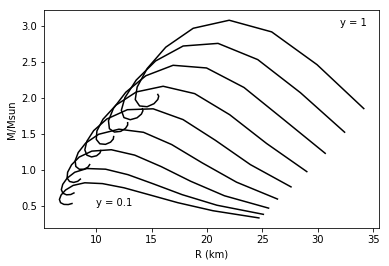

In [131]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
from scipy.interpolate import interp1d
from scipy.integrate import odeint

m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(h**3)

j = 0
y = np.arange(1,10,1)
for j in range(len(y)):
    def e(x) :
        return (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                  + (1/(3*pi**2))**2 *y[j]**2 *x**6 )/(c**2)
    def p(x):
        return (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                  + (1/(3*pi**2))**2 *y[j]**2 *x**6 )
   
    k = np.logspace(-15,-13.4,10000)
    x = k/(m*c)
    rho = e(x)
    P = p(x)
    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(1,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol[:,1] 


  

#plot M_R curve
    r = np.arange(1,5000000,1)
    rhocD = np.logspace(14.0,18,15)#up18
    listrhocD = np.zeros_like(rhocD)
    M = np.zeros_like(rhocD)
    R = np.zeros_like(rhocD)
    location = np.zeros_like(rhocD)
    i = 0
    for i in range(len(rhocD)) :
        diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
        lo = np.where (diff < 10)[0]
        lo1 = lo[0]
        M[i] = TOVsolve(rhocD[i])[lo1]
        R[i] = r[lo1]
        i = i + 1
    
    
    
# max M and R
    M_max = max(M)
    location1 = np.where(M == M_max)
    R_max = R[location1]

   
    Msun = 1.9e33
    #print("Max mass :",M_max/Msun)
    #print("Max mass radius :" ,R_max/100000)
    print(y[j])
    plt.plot(R/100000,M/Msun,color='k')
    j = j + 1
    
plt.text(10, 0.5, 'y = 0.1')
plt.text(32, 3, 'y = 1')
plt.xlabel('R (km)')
plt.ylabel('M/Msun')


plt.savefig('filename.png',dpi=300)


Max mass : 3.3664905873001767
Max mass radius : [25.36494]


(5, 40)

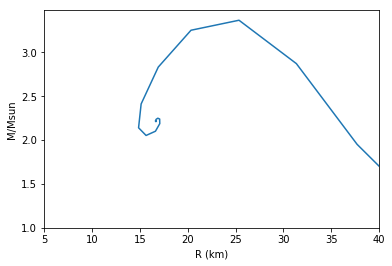

In [124]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d


m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(h**3)


y=10
def e(x) :
    return (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                  + (1/(3*pi**2))**2 *y**2 *x**6      )/c**2
def p(x):
    return (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                  + (1/(3*pi**2))**2 *y**2 *x**6     )

k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(1,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol[:,1] 
'''
r = np.arange(1,5000000,1)
rhoc = 5e15
plt.plot(r,TOVsolve(rhoc))
'''
#plot M_R curve
r = np.arange(1,5000000,1)
rhocD = np.logspace(13.5,21,20)#up22
M = np.zeros_like(rhocD)
R = np.zeros_like(rhocD)
location = np.zeros_like(rhocD)
i = 0
for i in range(len(rhocD)) :
    diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
    lo = np.where (diff < 1)[0]
    lo1 = lo[0]
    M[i] = TOVsolve(rhocD[i])[lo1]
    R[i] = r[lo1]
    i = i + 1
    
# max M and R
M_max = max(M)
location1 = np.where(M == M_max)
R_max = R[location1]

Msun = 1.9e33
print("Max mass :",M_max/Msun)
print("Max mass radius :" ,R_max/100000)
plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(5,40)

    

1
Max mass : 0.8209374847700005
Max mass radius : [9.38062]
2
Max mass : 1.021564012935921
Max mass radius : [9.5858]
3
Max mass : 1.2812667550526877
Max mass radius : [11.10285]
4
Max mass : 1.565910910424226
Max mass radius : [12.35714]
5
Max mass : 1.8595159589784964
Max mass radius : [14.44128]
6
Max mass : 2.1610284096818315
Max mass radius : [16.0476]
7
Max mass : 2.4645634819574265
Max mass radius : [17.7614]
8
Max mass : 2.769956234883585
Max mass radius : [19.57565]
9
Max mass : 3.0773259433723053
Max mass radius : [21.49552]
10
Max mass : 3.3866109544501266
Max mass radius : [23.52298]
11
Max mass : 3.69739393414422
Max mass radius : [25.6787]
12
Max mass : 4.008833138531572
Max mass radius : [27.93725]


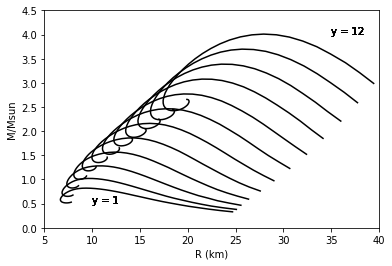

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d


m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(h**3)

j = 0
y=np.arange(1,13,1)
for j in range(len(y)):
    def e(x) :
        return (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                      + (1/(3*pi**2))**2 *y[j]**2 *x**6      )/c**2
    def p(x):
        return (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                      + (1/(3*pi**2))**2 *y[j]**2 *x**6     )

    k = np.logspace(-15,-13.4,10000)
    x = k/(m*c)

    rho = e(x)
    P = p(x)
    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(1,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol[:,1] 
    '''
    r = np.arange(1,5000000,1)
    rhoc = 5e15
    plt.plot(r,TOVsolve(rhoc))
    '''
    #plot M_R curve
    r = np.arange(1,5000000,1)
    rhocD = np.logspace(14.0,18,50)#up22
    M = np.zeros_like(rhocD)
    R = np.zeros_like(rhocD)
    location = np.zeros_like(rhocD)
    i = 0
    for i in range(len(rhocD)) :
        diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
        lo = np.where (diff < 1)[0]
        lo1 = lo[0]
        M[i] = TOVsolve(rhocD[i])[lo1]
        R[i] = r[lo1]
        i = i + 1

    # max M and R
    M_max = max(M)
    location1 = np.where(M == M_max)
    R_max = R[location1]
    
    plt.text(10, 0.5, 'y = 1')
    plt.text(35, 4, 'y = 12')
    plt.xlim(0,45)
    plt.ylim(0,4.5)
    Msun = 1.9e33
    print(y[j])
    print("Max mass :",M_max/Msun)
    print("Max mass radius :" ,R_max/100000)
    plt.plot(R/100000,M/Msun,color='k')
    plt.xlabel('R (km)')
    plt.ylabel('M/Msun')
    plt.xlim(5,40)
plt.savefig('filenameA.png',dpi=300)

1
Max mass : 2.442069691761375
Max mass radius : [19.60035]


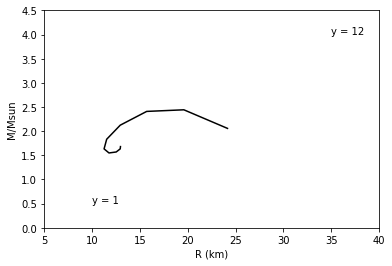

In [189]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d



c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(h**3)

mx_in_Mev = 1000
ma = []
ma_in_Mev =[60]
Ma = '$M_{A^{,}} / g^{,}$ = '
MeV = 'MeV'
j = 0
for j in range(len(ma_in_Mev)):
    ma.append( ma_in_Mev[j]*(1e6/6.241e11/8.98740441e20))
    mx = mx_in_Mev*(1e6/6.241e11/8.98740441e20)
    def e(x) :
        k = np.logspace(-15,-13.4,10000)
        x = k/(mx*c)
        return (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6      )/c**2
    def p(x):
        k = np.logspace(-15,-13.4,10000)
        x = k/(mx*c)
        return (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                      + (1/(3*pi**2))**2 *(mx/(2.37*ma[j]))**2 *x**6     )

    rho = e(x)
    P = p(x)
    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(1,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol[:,1] 
    '''
    r = np.arange(1,5000000,1)
    rhoc = 5e15
    plt.plot(r,TOVsolve(rhoc))
    '''
    #plot M_R curve
    r = np.arange(1,5000000,1)
    rhocD = np.logspace(14.5,18,10)#up22
    M = np.zeros_like(rhocD)
    R = np.zeros_like(rhocD)
    location = np.zeros_like(rhocD)
    i = 0
    for i in range(len(rhocD)) :
        diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
        lo = np.where (diff < 1)[0]
        lo1 = lo[0]
        M[i] = TOVsolve(rhocD[i])[lo1]
        R[i] = r[lo1]
        i = i + 1

    # max M and R
    M_max = max(M)
    location1 = np.where(M == M_max)
    R_max = R[location1]
    
    plt.text(10, 0.5, 'y = 1')
    plt.text(35, 4, 'y = 12')
    plt.xlim(0,45)
    plt.ylim(0,4.5)
    Msun = 1.9e33
    print(y[j])
    print("Max mass :",M_max/Msun)
    print("Max mass radius :" ,R_max/100000)
    plt.plot(R/100000,M/Msun,color='k')
    plt.xlabel('R (km)')
    plt.ylabel('M/Msun')
    plt.xlim(5,40)


Max mass : 0.7099414541382525
Max mass radius : [9.38399]
1
Max mass : 0.5019907363074039
Max mass radius : [6.70909]
2
Max mass : 0.409798782284362
Max mass radius : [5.43729]
3
Max mass : 0.35486526482283454
Max mass radius : [4.78706]
4


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\legend.py:640: UserWarning: Unrecognized location "left left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


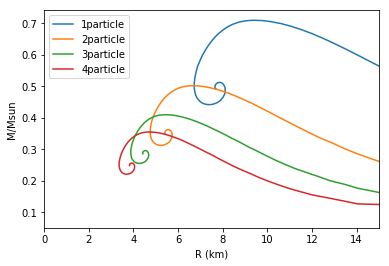

In [8]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import odeint

m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

particle = 'particle'
j = 0
N = np.arange(1,5,1)
for j in range(len(N)):   
    def e(x) :
        return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
        #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
    def p(x):
        return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
         #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
    k = np.logspace(-15,-13.4,10000)
    x = k/(m*c)

    rho = e(x) * N[j]
    P = p(x) *N[j]
    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(1,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol[:,1] 
    '''
    r = np.arange(1,5000000,1)
    rhoc = 5e15
    plt.plot(r,TOVsolve(rhoc))
    '''
    #plot M_R curve
    r = np.arange(1,5000000,1)
    rhocD = np.logspace(14,21,100)#up22
    M = np.zeros_like(rhocD)
    R = np.zeros_like(rhocD)
    location = np.zeros_like(rhocD)
    i = 0
    for i in range(len(rhocD)) :
        diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
        lo = np.where (diff < 1)[0]
        lo1 = lo[0]
        M[i] = TOVsolve(rhocD[i])[lo1]
        R[i] = r[lo1]
        i = i + 1

    # max M and R
    M_max = max(M)
    location1 = np.where(M == M_max)
    R_max = R[location1]

    Msun = 1.98892e33
    print("Max mass :",M_max/Msun)
    print("Max mass radius :" ,R_max/100000)
    plt.plot(R/100000,M/Msun,label= f'{N[j]}{particle}')
    plt.xlabel('R (km)')
    plt.ylabel('M/Msun')
    plt.xlim(0,15)
    print(N[j])   
    j = j + 1
plt.legend(loc='left left')
plt.savefig('filenameA.png',dpi=300)

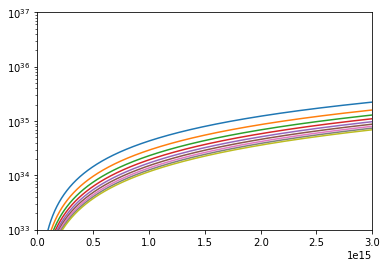

In [203]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d


m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

j = 0
N = np.arange(1,10,1)
for j in range(len(N)):   
    def e(x) :
        return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
        #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
    def p(x):
        return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
         #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
    k = np.logspace(-15,-13.4,10000)
    x = k/(m*c)

    rho = e(x) * N[j]
    P = p(x) *N[j]
    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")
    plt.plot(rho,P)
    j=j+1
    plt.yscale('log')
    plt.ylim(1e33,1e37)
    plt.xlim(0,3e15)

Max mass : 0.930511115628297
Max mass radius : [9.83193]


'\nimport numpy as np\nfrom scipy.optimize import curve_fit\nimport scipy.optimize\nimport matplotlib.pyplot as plt\nfrom numpy import diff\n%matplotlib inline\nfrom scipy.interpolate import interp1d\n\n\nm =1.6749286e-24\nc = 2.998e10\npi = 3.14159265359\nG = 6.67428e-8\nh = 1.0545716e-27\ne0 = m**4*c**5/(pi**2*h**3)\n\ndef e(x) :\n    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2\n    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2\ndef p(x):\n    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )\n     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))\nk = np.logspace(-15,-13.4,10000)\nx = k/(m*c)\n\nrho = e(x)\nP = p(x)\neos =  interp1d(rho,P,fill_value="extrapolate")\ninveos =  interp1d(P,rho,fill_value="extrapolate")\n\ndef TOV(y, r) :   \n    P, m = y[0], y[1]\n    rho = inveos\n    dPdr =  ( (-G*m*rh

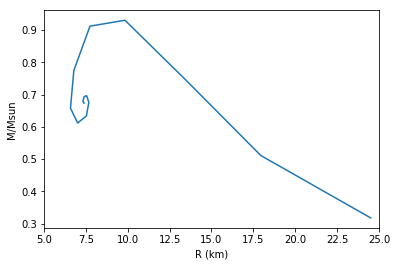

In [160]:
po = 15
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d


m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

def e(x) :
    return 6.107e15*x**3
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return 5.38e9*(6.107e15*x**3)**(5/3)
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(1,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol[:,1] 

#plot M_R curve
r = np.arange(1,5000000,1)
rhocD = np.logspace(14,21,po)#up22
M = np.zeros_like(rhocD)
R = np.zeros_like(rhocD)
location = np.zeros_like(rhocD)
i = 0
for i in range(len(rhocD)) :
    diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
    lo = np.where (diff < 1)[0]
    lo1 = lo[0]
    M[i] = TOVsolve(rhocD[i])[lo1]
    R[i] = r[lo1]
    i = i + 1
    
# max M and R
M_max = max(M)
location1 = np.where(M == M_max)
R_max = R[location1]

Msun = 1.98892e33
print("Max mass :",M_max/Msun)
print("Max mass radius :" ,R_max/100000)
plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(5,25)

'''
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d


m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

def e(x) :
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(1,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol[:,1] 

#plot M_R curve
r = np.arange(1,5000000,1)
rhocD = np.logspace(14,21,po)#up22
M = np.zeros_like(rhocD)
R = np.zeros_like(rhocD)
location = np.zeros_like(rhocD)
i = 0
for i in range(len(rhocD)) :
    diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
    lo = np.where (diff < 1)[0]
    lo1 = lo[0]
    M[i] = TOVsolve(rhocD[i])[lo1]
    R[i] = r[lo1]
    i = i + 1
    
# max M and R
M_max = max(M)
location1 = np.where(M == M_max)
R_max = R[location1]

Msun = 1.98892e33
print("Max mass :",M_max/Msun)
print("Max mass radius :" ,R_max/100000)
plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(5,25)
'''

In [150]:
from math import log
rhoc = 5e17
diff = np.diff([log(y,10) for y in TOVsolve(rhoc)]) / np.diff(r)
print(diff)

[5.22878750e-01 4.62397994e-01 3.57145935e-01 ... 4.27407798e-09
 4.27407087e-09 4.27406377e-09]


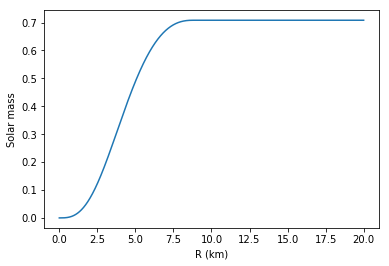

In [52]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import odeint

m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

def e(x) :
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(1,2000000,10)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol[:,1] 

r = np.arange(1,2000000,10)
rhoc = 5e15
plt.plot(r/100000,TOVsolve(rhoc)/1.98892e33)
plt.xlabel('R (km)')
plt.ylabel('Solar mass')
plt.savefig('New.png',dpi=300)

Max mass : 0.9086306477522018
Max mass radius : [45.35684]


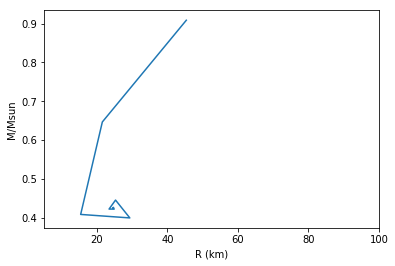

In [89]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import odeint

m = 9.1e-28
mn =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)



def e(x) :
    n = (k**3)/(3*pi**2*h**3)
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)         ) /c**2 + n*mn*2.15
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)
n = (k**3)/(3*pi**2*h**3)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(1,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol
'''
r = np.arange(1,5000000,1)
rhoc = 5e15
plt.plot(r,TOVsolve(rhoc))
print(TOVsolve(rhoc))
'''
#plot M_R curve
r = np.arange(1,5000000,1)
rhocD = np.logspace(14.35,25,10)#up22
M = np.zeros_like(rhocD)
R = np.zeros_like(rhocD)
location = np.zeros_like(rhocD)
i = 0
for i in range(len(rhocD)) :
    P = TOVsolve(rhocD[i])[:,0]
    m = TOVsolve(rhocD[i])[:,1]
    location = np.where(P<1)[0][0]
    R[i] = r[location]
    M[i] = m[location]
    i = i + 1
    
# max M and R
M_max = max(M)
location1 = np.where(M == M_max)
R_max = R[location1]

Msun = 1.98892e33
print("Max mass :",M_max/Msun)
print("Max mass radius :" ,R_max/100000)
plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')
plt.xlim(5,100)
plt.savefig('New.png',dpi=300)


In [66]:
print(n*mn*2)

[9.64666239e+10 9.65733124e+10 9.66801188e+10 ... 6.07319161e+15
 6.07990833e+15 6.08663249e+15]


In [2]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import odeint


m =1.6749286e-24*(0.5)
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(pi**2*h**3)

def e(x) :
    return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.arcsinh(x)) /c**2
    #return (e0/8) *(  ((2*x**3 + x) * (1 + x**2)**(1/2))      -  np.log( x + ((1 + x**2)**(1/2))    )) /c**2
def p(x):
    return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.arcsinh(x)    )
     #return (e0/24) *(  ((2*x**3 - 3*x) * (1 + x**2)**(1/2))      + 3*np.log( x + ((1 + x**2)**(1/2))    ))
k = np.logspace(-15,-13.4,10000)
x = k/(m*c)

rho = e(x)
P = p(x)
eos =  interp1d(rho,P,fill_value="extrapolate")
inveos =  interp1d(P,rho,fill_value="extrapolate")

def TOV(y, r) :   
    P, m = y[0], y[1]
    rho = inveos
    dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
    dmdr = 4.0*pi*r**2*rho(P)
    return np.array([dPdr, dmdr])

def TOVsolve(rhoc):
    r = np.arange(1,5000000,1)
    m = 4.0*pi*r[0]**3*rhoc
    P = eos(rhoc)
    psol = odeint(TOV,[P,m],r)
    return  psol
'''
r = np.arange(1,5000000,1)
rhoc = 5e15
plt.plot(r,TOVsolve(rhoc))
'''
#plot M_R curve
r = np.arange(1,5000000,1)
rhocD = np.logspace(13.9,23,50)#up22
M = np.zeros_like(rhocD)
R = np.zeros_like(rhocD)
location = np.zeros_like(rhocD)
i = 0
for i in range(len(rhocD)) :
    P = TOVsolve(rhocD[i])[:,0]
    m = TOVsolve(rhocD[i])[:,1]
    location = np.where(P<1)[0][0]
    R[i] = r[location]
    M[i] = m[location]
    i = i + 1
    
# max M and R
M_max = max(M)
location1 = np.where(M == M_max)
R_max = R[location1]

Msun = 1.98892e33
print("Max mass :",M_max/Msun)
print("Max mass radius :" ,R_max/100000)
plt.plot(R/100000,M/Msun)
plt.xlabel('R (km)')
plt.ylabel('M/Msun')


KeyboardInterrupt: 

1
Max mass : 0.834329499417862
Max mass radius : [9.38218]
2
Max mass : 1.0633044363900501
Max mass radius : [9.65011]
3
Max mass : 1.353974150554858
Max mass radius : [11.25919]
4
Max mass : 1.6659768718625645
Max mass radius : [13.23744]
5
Max mass : 1.9894479013410222
Max mass radius : [14.81391]
6
Max mass : 2.31678280605498
Max mass radius : [17.317]
7
Max mass : 2.649550200017132
Max mass radius : [19.19889]
8
Max mass : 2.9834193733581555
Max mass radius : [21.19097]
9
Max mass : 3.3186740230047285
Max mass radius : [23.30655]
10
Max mass : 3.655340316397706
Max mass radius : [25.53778]
11
Max mass : 3.9930139562309677
Max mass radius : [27.88757]
12
Max mass : 4.330799256294856
Max mass radius : [30.37326]


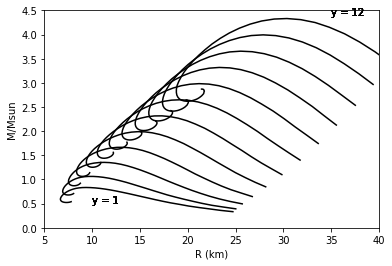

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize
import matplotlib.pyplot as plt
from numpy import diff
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.integrate import odeint

m =1.6749286e-24
c = 2.998e10
pi = 3.14159265359
G = 6.67428e-8
h = 1.0545716e-27
e0 = m**4*c**5/(h**3)

j = 0
y=np.arange(1,13,1)
for j in range(len(y)):
    def e(x) :
        return (e0) *( (1/(8*pi**2)) * ((2*x**3 + x) * (1 + x**2)**(1/2))   -  (1/(8*pi**2)) * np.arcsinh(x)\
                      + 1.18*(1/(3*pi**2))**2 *y[j]**2 *x**6      )/c**2
    def p(x):
        return (e0) *( (1/(24*pi**2)) *((2*x**3 - 3*x) * (1 + x**2)**(1/2)) + 3*(1/(24*pi**2)) *np.arcsinh(x) 
                      + 1.18*(1/(3*pi**2))**2 *y[j]**2 *x**6     )

    k = np.logspace(-15,-13.4,10000)
    x = k/(m*c)

    rho = e(x)
    P = p(x)
    eos =  interp1d(rho,P,fill_value="extrapolate")
    inveos =  interp1d(P,rho,fill_value="extrapolate")

    def TOV(y, r) :   
        P, m = y[0], y[1]
        rho = inveos
        dPdr =  ( (-G*m*rho(P))/(r**2) ) * (1+( P/(rho(P)*c**2) )) * (1+ ( (4*pi*P*r**3) /(m*c**2) )) *( (1- ((2*G*m)/(r*c**2))  )**(-1) )        
        dmdr = 4.0*pi*r**2*rho(P)
        return np.array([dPdr, dmdr])

    def TOVsolve(rhoc):
        r = np.arange(1,5000000,1)
        m = 4.0*pi*r[0]**3*rhoc
        P = eos(rhoc)
        psol = odeint(TOV,[P,m],r)
        return  psol[:,1] 
    '''
    r = np.arange(1,5000000,1)
    rhoc = 5e15
    plt.plot(r,TOVsolve(rhoc))
    '''
    #plot M_R curve
    r = np.arange(1,5000000,1)
    rhocD = np.logspace(14.0,18,50)#up22
    M = np.zeros_like(rhocD)
    R = np.zeros_like(rhocD)
    location = np.zeros_like(rhocD)
    i = 0
    for i in range(len(rhocD)) :
        diff = np.diff(TOVsolve(rhocD[i])) / np.diff(r)
        lo = np.where (diff < 1)[0]
        lo1 = lo[0]
        M[i] = TOVsolve(rhocD[i])[lo1]
        R[i] = r[lo1]
        i = i + 1

    # max M and R
    M_max = max(M)
    location1 = np.where(M == M_max)
    R_max = R[location1]
    
    plt.text(10, 0.5, 'y = 1')
    plt.text(35, 4.4, 'y = 12')
    plt.xlim(0,50)
    plt.ylim(0,4.5)
    Msun = 1.9e33
    print(y[j])
    print("Max mass :",M_max/Msun)
    print("Max mass radius :" ,R_max/100000)
    plt.plot(R/100000,M/Msun,color='k')
    plt.xlabel('R (km)')
    plt.ylabel('M/Msun')
    plt.xlim(5,40)
plt.savefig('filenameA.png',dpi=300)